In [100]:
%%bash
mkdir $HOME/.keras
cp keras.json $HOME/.keras/.

mkdir: cannot create directory ‘/home/jovyan/.keras’: File exists
cp: cannot stat 'keras.json': No such file or directory


In [43]:
import tensorflow as tf
import keras 
device_name = tf.test.gpu_device_name()
#keras.backend.image_data_format()
keras.__version__
tf.__version__
print(tf.test.gpu_device_name())

/device:GPU:0


In [46]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import hyperopt.fmin as hypfmin
import keras
import theano
import random
import os
import pickle
# from
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.optimizers import Adam
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
keras.__version__
ε = 1
σ = 2
print(ε,σ,σ,keras.__version__)

1 2 2 1.2.2


In [47]:
import os
from theano import function, config, shared, tensor
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 100000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], tensor.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, tensor.Elemwise) and
              ('Gpu' not in type(x.op).__name__)
              for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[GpuElemwise{exp,no_inplace}(<GpuArrayType<None>(float32, vector)>), HostFromGpu(gpuarray)(GpuElemwise{exp,no_inplace}.0)]
Looping 100000 times took 29.606136 seconds
Result is [1.2317803 1.6187935 1.5227807 ... 2.2077181 2.2996776 1.623233 ]
Used the gpu


In [49]:
!pip install pyro-ppl 

    100% |████████████████████████████████| 71kB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 1.6MB 238kB/s ta 0:00:01    94% |██████████████████████████████▎ | 1.5MB 6.9MB/s eta 0:00:01
    100% |████████████████████████████████| 491kB 835kB/s ta 0:00:011
  Running setup.py bdist_wheel for pyro-ppl ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/51/fb/ba/0ff962e95a4f61025ff5262bd9f36c983e728db3bc1bb1cbd4
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/a0/33/4e/7c9228ea77f8090e895d8d2b76f3b5a76997a5b3edeb4e2c6f
  Running setup.py bdist_wheel for observations ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/8b/b7/74/106ea929310039388cf7ddbddd40fe3d0b77af36e51405f653
Successfully built pyro-ppl networkx observations
  Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11
You are using pip version 9.0.1, however versio

In [50]:
import torch 
vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000
t0 = time.time()
for i in range(iters):
    rng = torch.rand(vlen).cuda()
    print(torch.exp(rng).cuda().mean())
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))


1.718062162399292
1.7174491882324219
1.7187464237213135
1.7174005508422852
1.7173093557357788
1.7184616327285767
1.7190818786621094
1.7198518514633179
1.7194294929504395
1.7181050777435303
1.7170093059539795
1.7199640274047852
1.7184996604919434
1.7193413972854614
1.7193055152893066
1.7189314365386963
1.7171235084533691
1.7179014682769775
1.7187113761901855
1.7167631387710571
1.7184247970581055
1.7195534706115723
1.7174320220947266
1.7181025743484497
1.718043565750122
1.7172857522964478
1.7185003757476807
1.71705162525177
1.7187999486923218
1.716813564300537
1.7191725969314575
1.7183152437210083
1.7194275856018066
1.7185500860214233
1.717462182044983
1.7193547487258911
1.7185266017913818
1.7168415784835815
1.717861294746399
1.715272307395935
1.7203388214111328
1.7198158502578735
1.7201447486877441
1.7163861989974976
1.7177456617355347
1.7182488441467285
1.7170679569244385
1.7184967994689941
1.718663215637207
1.718636155128479
1.7181655168533325
1.7182408571243286
1.7168893814086914
1.7

1.7165145874023438
1.7183250188827515
1.7177917957305908
1.7176841497421265
1.720916986465454
1.718488097190857
1.7181339263916016
1.7162659168243408
1.7175390720367432
1.71788489818573
1.7179234027862549
1.7186307907104492
1.7158194780349731
1.7191158533096313
1.720062255859375
1.7199342250823975
1.717978596687317
1.7171002626419067
1.7187106609344482
1.7181934118270874
1.7198289632797241
1.718315839767456
1.7183233499526978
1.7189853191375732
1.7187747955322266
1.7179166078567505
1.7209779024124146
1.7164561748504639
1.71831214427948
1.7166433334350586
1.7163903713226318
1.7172178030014038
1.7174357175827026
1.7203782796859741
1.719074010848999
1.7193197011947632
1.7184969186782837
1.7173798084259033
1.71888267993927
1.718077540397644
1.7183376550674438
1.7192950248718262
1.7206518650054932
1.7185842990875244
1.7163974046707153
1.718512773513794
1.7173137664794922
1.7195842266082764
1.7180615663528442
1.7186572551727295
1.7176264524459839
1.718956470489502
1.7188657522201538
1.716985

1.7179006338119507
1.7184644937515259
1.7200355529785156
1.7184956073760986
1.718680500984192
1.7181634902954102
1.7193546295166016
1.7185124158859253
1.7190176248550415
1.7176787853240967
1.717116117477417
1.718778133392334
1.7183071374893188
1.7187509536743164
1.717525601387024
1.718712568283081
1.7175577878952026
1.717323899269104
1.7177844047546387
1.7192816734313965
1.717535376548767
1.7172904014587402
1.720382809638977
1.7188389301300049
1.7196263074874878
1.7190455198287964
1.7198591232299805
1.7178363800048828
1.718355417251587
1.7202907800674438
1.7178906202316284
1.7170093059539795
1.7164561748504639
1.7189439535140991
1.7162063121795654
1.7193958759307861
1.7169170379638672
1.7212682962417603
1.7176998853683472
1.7187913656234741
1.7177644968032837
1.7193790674209595
1.7187747955322266
1.7188218832015991
1.7195379734039307
1.7167198657989502
1.7179781198501587
1.7167761325836182
1.717245101928711
1.7185828685760498
1.7208431959152222
1.7187063694000244
1.7191976308822632
1.7

In [101]:
y=np.linspace(1,-1,3)
x=np.linspace(1,3,3)
xy=0
for i,j in zip(x,y):
    xy+=((i-x.mean())*(j-y.mean()))
    print(xy)
print(xy/(x.std()*y.std())/3)
np.correlate(x,y)
np.correlate((x-x.mean())/x.std(),(y-y.mean())/y.std())
np.corrcoef((x-x.mean())/x.std(),(y-y.mean())/y.std())
#np.corrcoef(x,y)


-1.0
-1.0
-2.0
-1.0


array([[ 1., -1.],
       [-1.,  1.]])

In [51]:
import numpy as np
import torch
import torch.nn as nn

from torch.autograd import Variable

import pyro
from pyro.distributions import Normal
from pyro.infer import SVI
from pyro.optim import Adam

In [52]:
N = 100  # size of toy data
p = 1    # number of features

def build_linear_dataset(N, noise_std=0.1):
    X = np.linspace(-6, 6, num=N)
    y = 3 * X + 1 + np.random.normal(0, noise_std, size=N)
    X, y = X.reshape((N, 1)), y.reshape((N, 1))
    X, y = Variable(torch.Tensor(X)), Variable(torch.Tensor(y))
    return torch.cat((X, y), 1)

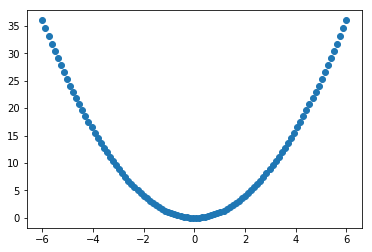

In [62]:
import matplotlib.pyplot as plt
x = np.linspace(-6, 6, num=N)
#x,y,z=build_linear_dataset(100)
y=x*x
plt.scatter(x,y)

In [53]:
class RegressionModel(nn.Module):
    def __init__(self, p):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(p, 1)

    def forward(self, x):
        return self.linear(x)

regression_model = RegressionModel(p)

In [54]:

loss_fn = torch.nn.MSELoss(size_average=False)
optim = torch.optim.Adam(regression_model.parameters(), lr=0.01)
num_iterations = 500

def main():
    data = build_linear_dataset(N, p)
    x_data = data[:, :-1]
    y_data = data[:, -1]
    for j in range(num_iterations):
        # run the model forward on the data
        y_pred = regression_model(x_data)
        # calculate the mse loss
        loss = loss_fn(y_pred, y_data)
        # initialize gradients to zero
        optim.zero_grad()
        # backpropagate
        loss.backward()
        # take a gradient step
        optim.step()
        if (j + 1) % 50 == 0:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss.data[0]))
    # Inspect learned parameters
    print("Learned parameters:")
    for name, param in regression_model.named_parameters():
        print("%s: %.3f" % (name, param.data.numpy()))

if __name__ == '__main__':
    main()

[iteration 0050] loss: 8839.3018
[iteration 0100] loss: 6130.5488
[iteration 0150] loss: 4124.8853
[iteration 0200] loss: 2689.6694
[iteration 0250] loss: 1701.4731
[iteration 0300] loss: 1049.1094
[iteration 0350] loss: 637.4866
[iteration 0400] loss: 389.8778
[iteration 0450] loss: 248.1486
[iteration 0500] loss: 171.0564
Learned parameters:
linear.weight: 2.767
linear.bias: 1.181


In [39]:
import torch
print(torch.cuda.is_available())
print(torch.rand(100^5,100^2).cuda())


True

 0.9346  0.8221  0.9160  ...   0.4609  0.9975  0.5149
 0.3294  0.9540  0.6797  ...   0.6439  0.4402  0.2785
 0.4150  0.8610  0.4438  ...   0.9160  0.5206  0.3503
          ...             ⋱             ...          
 0.8968  0.2835  0.1347  ...   0.9755  0.4420  0.5171
 0.5906  0.5801  0.3682  ...   0.2328  0.7493  0.2015
 0.7859  0.9240  0.7231  ...   0.0510  0.0459  0.2803
[torch.cuda.FloatTensor of size 97x102 (GPU 0)]



In [106]:
#theano.__version__
torch.__version__

'0.3.0'

## Set plotting style

In [20]:
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid',
              {'axes.grid': True,
               'grid.linestyle': u'--',
               'axes.edgecolor': '0.1',
               'axes.labelcolor': '0',
               'axes.labelsize': 15,
               'axes.titlesize': 15,
               'legend.fontsize': 15,
               'xtick.labelsize': 15,
               'ytick.labelsize': 15,
               })

NameError: name 'plt' is not defined

In [71]:
ls

Notebook_1_CNN_Model_Training_with_Hyperparameter_Search.ipynb
Notebook_2_CNN_Predictions_of_Random_UTR_HIS3_data.ipynb
Notebook_3_CNN_Predictions_of_Native_UTR_HIS3_data.ipynb
Notebook_4_Generating_Model_Directed_Evolution_of_UTRs_From_100_Native_and_Random_UTRs.ipynb
saved_model.t7
utr_pytorch.ipynb
Yeast_Pytorch.ipynb


## Check if the various directories that you might care about in the future are present

In [6]:
import os
data_dir = '../Data/'
results_dir = '../Results/'
figures_dir = '../Figures/'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)
    
if not os.path.exists(results_dir):
    os.mkdir(results_dir)
    
if not os.path.exists(figures_dir):
    os.mkdir(figures_dir)

## Create a directory to save the model parameters:

In [7]:
model_name = 'Random_UTR_CNN'
model_params_dir = '../Results/{0}.Hyperparam.Opt/'.format(model_name)

if not os.path.exists(model_params_dir):
    os.mkdir(model_params_dir)

In [8]:
%%sh
ls ../Results/

ls ../..


EvolvedUTRs
Random_UTR_CNN.Hyperparam.Opt
Random_UTR_CNN_Hyperparams.tar.gz
161222_ip_ugi_band_PSMs.txt
170523_1_EColi_170524165739-(2)_PeptideGroups.txt
170523_1_EColi_170524165739-(2)_ProteinGroups.txt
170523_1_EColi_170524165739-(2)_Proteins.txt
170523_1_EColi_170524165739-(2)_ResultStatistics.txt
2017---Deep-learning-yeast-UTRs
aifMsms.txt
allPeptides.txt
check.txt
CMakeLists.txt
Combo.txt
Comet-chunk.ipynb
Comet.ipynb
CoMMpass_IA8b.txt
CoMMpass_IA8b.txtcoxPHsortNoLog2.txt
CoMMpass_IA8b.txtcoxPHsort.txt
CoMMpass_IA8b.txtcoxPH.txt
Compass_Survival_per.txt
Compass_Survival.txt
Copy of 170214 total proteome lymphom 0p05 SILAC pluss LFQ (2).txt
Copy of Strainssamples_shuffled_final_150617.txt
Copy of SuperSILACpTtestImp.txt
Copy of toptags_DE5 (2).txt
Copy of toptags_DE5 (3).txt
Deamidation (NQ)Sites.txt
ECCO 2017 Breath Test.txt
EcoliMascotLog2SSttestPB.txt
Elasticsearch.ipynb
evidence.txt
fastakey.txt
GroupsMascot.txt
Groups.txt
keras.json
Keyfile_pegfam_annot.txt
LFQttestPBs0p10.txt

## Load our cleaned up data.

The csv should be tab-separated. The read counts are log2.

In [164]:
import pandas as pd
#data = pd.read_csv(data_dir + 'Random_UTRs.csv.gz')
#data = pd.read_csv("https://github.com/animesh/2017---Deep-learning-yeast-UTRs/raw/master/Data/Random_UTRs.csv.gz")
#data = pd.read_csv("https://github.com/animesh/2017---Deep-learning-yeast-UTRs/raw/master/Data/posw.csv")
data.head()

,Clone,RFP,DNASeq,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6,Pos7,...,Pos203,Pos204,Pos205,Pos206,Pos207,Pos208,Pos209,Pos210,Pos211,pred_growth_rate
0,E6,2246,TCTCCTCATTTCTATTGAGTCATCCTAGCATTAGAGTTATTTGTCA...,T,C,T,C,C,T,C,...,A,G,T,T,G,C,A,T,A,5310.665527
1,F4,3878,CTTAGCGTGTTCGCGTGTCGAGTAGTGTAATGATAAATATTTTTAA...,C,T,T,A,G,C,G,...,A,G,G,T,G,G,T,T,T,5325.514648
2,A4,4854,ATTTCTGCGATCCGGTTAGGAAATAACTTTCCTGAATGTGAAGGTG...,A,T,T,T,C,T,G,...,A,G,C,G,T,C,G,T,A,5292.278809
3,G2,5191,TTGACCCTATCTTGGTCTATTAAAGTGCAGGCACGTACATGTTTCT...,T,T,G,A,C,C,C,...,A,G,G,C,G,A,T,C,T,5322.292969
4,D5,5203,GTGTCCTTTAACCAGATCGGCGTCATGTGCGTGTGAACGGAGTTCT...,G,T,G,T,C,C,T,...,A,G,A,G,C,G,T,C,G,5304.737305


(array([ 1.,  1., 10.,  9.,  8., 13., 22., 15.,  3.,  6.]),
 array([11.13314221, 11.60700167, 12.08086113, 12.5547206 , 13.02858006,
        13.50243952, 13.97629898, 14.45015844, 14.9240179 , 15.39787736,
        15.87173682]),
 <a list of 10 Patch objects>)

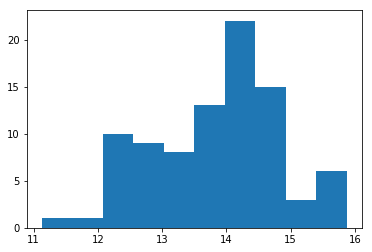

In [42]:
%matplotlib inline
import numpy as np
plt.hist(np.log2(df['expression']))
#data.hist()

In [165]:
df=data.rename(columns={"DNASeq":"seq_column","RFP":"expression"})

## One-hot encoding of the sequences.

i.e. we're converting the sequences from being represented as a 50 character string of bases to a 4x50 matrix of 1's and 0's, with each row corresponding to a base and every column a position in the UTR.

In [17]:
# one hot encoding of UTRs
# X = one hot encoding matrix
# Y = growth rates

def one_hot_encoding(df, seq_column, expression):
    
    bases = ['A','C','G','T']
    base_dict = dict(zip(bases,range(4))) # {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3}

    n = len(df)
    
    # length of the UTR sequence
    # we also add 10 empty spaces to either side
    total_width = df[seq_column].str.len().max() + 20
    
    # initialize an empty numpy ndarray of the appropriate size
    X = np.zeros((n, 1, 4, total_width))
    
    # an array with the sequences that we will one-hot encode
    seqs = df[seq_column].values
    
    # loop through the array of sequences to create an array that keras will actually read
    for i in range(n):
        seq = seqs[i]
        
        # loop through each individual sequence, from the 5' to 3' end
        for b in range(len(seq)):
            # this will assign a 1 to the appropriate base and position for this UTR sequence
            X[i, 0, base_dict[seq[b]], int(b + round((total_width - len(seq))/2.))] = 1.
    
        # keep track of where we are
        if (i%10)==0:
            print(i),
        
    X = X.astype(theano.config.floatX)
    Y = np.asarray(df[expression].values,
                   dtype = theano.config.floatX)[:, np.newaxis]
    
    return X, Y, total_width

In [108]:
X, Y, total_width = one_hot_encoding(df, 'seq_column', 'expression')

0
10
20
30
40
50
60
70
80


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([14.82970972, 14.92970972, 15.02970972, 15.12970972, 15.22970972,
        15.32970972, 15.42970972, 15.52970972, 15.62970972, 15.72970972,
        15.82970972]),
 <a list of 10 Patch objects>)

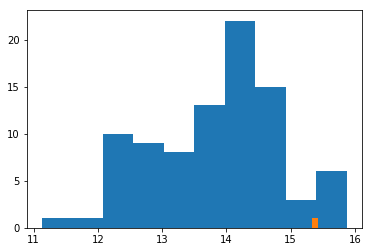

In [115]:
plt.hist(np.log2(Y))
plt.hist(np.sqrt(total_width))


## Split the data into test and training sets

If we have more reads for a given UTR at the outset, we can be more confident that we have made an accurate measurement. For this reason, we use those UTRs with the most reads to test our model on, because these should have the least experimental noise. We hold out the UTRs that fall in top 5% of reads at the first time point as our test set.

In [131]:
# a sorted numpy array of UTR indexes, from least reads to most reads
sorted_inds = df.sort_values('expression').index.values
train_inds = sorted_inds[:int(0.9*len(sorted_inds))]
test_inds = sorted_inds[int(0.9*len(sorted_inds)):] 
seed = 0.1
random.shuffle(train_inds, lambda :seed)
print(train_inds,test_inds)

[ 9 19 29 39 49 59 69  8  0 10 11 12 13 14 15 16 17 18  1 20 21 22 23 24
 25 26 27 28  2 30 31 32 33 34 35 36 37 38  3 40 41 42 43 44 45 46 47 48
  4 50 51 52 53 54 55 56 57 58  5 60 61 62 63 64 65 66 67 68  6 70 71 72
 73 74 75 76 77 78  7] [79 80 81 82 83 84 85 86 87]


## Hyperparameter search

Before training the model, we perform a hyperparameter search to narrow down which model architecture to use. Of course, we do a fair amount of narrowing ourselves by selecting which architectures are available for the search.

The dictionary 'hyperparams' has the same values as the 'space' object, 'space' is just the form that's compatible with hyperopt.

In [136]:
hyperparams = {'conv_width' : [9, 13, 17, 25],
               'conv_filters' : [32, 64, 128, 256],
               'conv_layers' : [2, 3, 4],
               'dense_layers' : [1, 2],
               'conv_dropout' : [None, 0.15],
               #'dense_dropout' : [None, 0.1, 0.25, 0.5],
               'dense_dropout' : [None, 0.0025, 0.005, 0.0075],
               'dense_units' : [32, 64, 128, 256]}

In [137]:
space = {   'conv_width': hp.choice('conv_width', [9, 13, 17, 25]),
            'conv_filters': hp.choice('conv_filters', [32, 64, 128, 256]),
            'conv_layers': hp.choice('conv_layers', [2, 3, 4]),
            'dense_layers': hp.choice('dense_layers', [1, 2]),
            'conv_dropout': hp.choice('conv_dropout',  [None, 0.15]),
            #'dense_dropout': hp.choice('dense_dropout', [None, 0.1, 0.25, 0.5]),
            'dense_dropout': hp.choice('dense_dropout', [None, 0.026, 0.051, 0.076]),
            'dense_units': hp.choice('dense_units', [32, 64, 128, 256]),
        }

#### Defining a function to build the model

- Note: we reuse this same function lower down after we've decide on a model architecture 

In [132]:
def create_model(params):
    model = Sequential()
    model.add(Convolution2D(params['conv_filters'],
                            4,
                            params['conv_width'],
                            border_mode = 'valid',
                            input_shape = (1, 4, total_width),
                            activation = 'relu'))
    
    # add dropout at the convolutional layers if appropriate
    if params['conv_dropout']:
        model.add(Dropout(p = params['conv_dropout']))
    
    # add the appropriate number of additional convolutional layers, along with dropout
    for i in range(params['conv_layers'] - 1):
        model.add(Convolution2D(params['conv_filters'],
                                1,
                                params['conv_width'],
                                border_mode = 'same',
                                activation = 'relu'))
        
        if params['conv_dropout']:
            model.add(Dropout(params['conv_dropout']))
    
    model.add(Flatten())
    
    # add the appropriate number of dense layers and dropout
    for i in range(params['dense_layers']):
        model.add(Dense(output_dim = params['dense_units'],
                        activation = 'relu'))
        
        if params['dense_dropout']:
            model.add(Dropout(p = params['dense_dropout']))
    
    # add the output layer, since we want to predict the "growth rate" we only want a single 
    # number, hence the single dimension
    model.add(Dense(output_dim = 1))
    
    # compile the model
    model.compile(loss = 'mean_squared_error',
                  optimizer = 'adam',
                  metrics = ['mean_squared_error'])
    
    return model

#### We also need a function that builds and fits the model, which we can pass to the hyperparameter search.

- It also returns some information regarding overfitting, etc.
- note that the data is included inside the function, I'm not passing it to the function.

In [133]:
def f_nn(params):
    
    model = create_model(params)
    
    # track model overfitting
    earlyStopping = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 1,
                                                  verbose = 0,
                                                  mode = 'auto')
    history = keras.callbacks.History()
    
    # keep track of where we are while the code in this cell is running
    global n
    print("\n"), n
    n+=1
    print(params)
    
    # fit the model
    # note that I'm not passing the data to this function, I've just included it here (i.e. I've
    # included X and Y)
    model.fit(X[train_inds],
              Y[train_inds],
              validation_split = 0.2,
              callbacks = [earlyStopping, history],
              verbose = 0,
              nb_epoch = 100)
    
    print('MSE:',earlyStopping.best)
    return {'loss': earlyStopping.best, 'status': STATUS_OK}

#### Actually perform the hyperparameter search.

A note here, there're random elements in keras and hypfmin that I don't understand how to control, so I haven't been able to set a seed that will allow you to obtain exactly the same results for the hyperparameter search that we have.

In [138]:
from keras import backend as K
K.set_image_dim_ordering('th')
n = 0

trials = Trials()
best = hypfmin(f_nn, space,algo = tpe.suggest,max_evals = 100,trials = trials)

print('best: ',best)




{'conv_dropout': None, 'conv_filters': 256, 'conv_layers': 2, 'conv_width': 25, 'dense_dropout': None, 'dense_layers': 1, 'dense_units': 256}
MSE: 66074040.0


{'conv_dropout': None, 'conv_filters': 128, 'conv_layers': 2, 'conv_width': 25, 'dense_dropout': 0.076, 'dense_layers': 1, 'dense_units': 32}
MSE: 86126648.0


{'conv_dropout': None, 'conv_filters': 128, 'conv_layers': 4, 'conv_width': 25, 'dense_dropout': 0.026, 'dense_layers': 1, 'dense_units': 128}
MSE: 52584860.0


{'conv_dropout': 0.15, 'conv_filters': 32, 'conv_layers': 3, 'conv_width': 9, 'dense_dropout': 0.051, 'dense_layers': 1, 'dense_units': 64}
MSE: 84484448.0


{'conv_dropout': 0.15, 'conv_filters': 32, 'conv_layers': 3, 'conv_width': 17, 'dense_dropout': 0.076, 'dense_layers': 2, 'dense_units': 256}
MSE: 74256312.0


{'conv_dropout': 0.15, 'conv_filters': 128, 'conv_layers': 4, 'conv_width': 17, 'dense_dropout': None, 'dense_layers': 2, 'dense_units': 256}
MSE: 53051804.0


{'conv_dropout': 0.15, 'conv_filters': 

MSE: 100428784.0


{'conv_dropout': None, 'conv_filters': 128, 'conv_layers': 2, 'conv_width': 25, 'dense_dropout': 0.026, 'dense_layers': 2, 'dense_units': 128}
MSE: 78070504.0


{'conv_dropout': 0.15, 'conv_filters': 256, 'conv_layers': 4, 'conv_width': 17, 'dense_dropout': 0.051, 'dense_layers': 1, 'dense_units': 64}
MSE: 56975436.0


{'conv_dropout': None, 'conv_filters': 32, 'conv_layers': 4, 'conv_width': 9, 'dense_dropout': None, 'dense_layers': 2, 'dense_units': 128}
MSE: 78554512.0


{'conv_dropout': 0.15, 'conv_filters': 128, 'conv_layers': 4, 'conv_width': 25, 'dense_dropout': 0.076, 'dense_layers': 1, 'dense_units': 32}
MSE: 54714208.0


{'conv_dropout': None, 'conv_filters': 128, 'conv_layers': 2, 'conv_width': 17, 'dense_dropout': 0.026, 'dense_layers': 2, 'dense_units': 256}
MSE: 71872216.0


{'conv_dropout': 0.15, 'conv_filters': 64, 'conv_layers': 3, 'conv_width': 13, 'dense_dropout': None, 'dense_layers': 2, 'dense_units': 128}
MSE: 76251792.0


{'conv_dropout': None,

pickle the model

In [139]:
with open(model_params_dir + 'hyperparam_test.pkl', 'wb') as f:
#with open(model_params_dir + 'hyperparam_test.pkl', 'w') as f:
    pickle.dump(trials.trials, f)

and take a look a the winning architecture

In [140]:
opt_params = {}

for p in best:
    opt_params[p] = hyperparams[p][best[p]]

In [141]:
opt_params

{'conv_dropout': None,
 'conv_filters': 128,
 'conv_layers': 4,
 'conv_width': 25,
 'dense_dropout': 0.0025,
 'dense_layers': 1,
 'dense_units': 128}

## Create and train the convolutional neural network

In [142]:
model = create_model(opt_params)

In [143]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience = 0,
                                              verbose = 0,
                                              mode = 'auto')

history = keras.callbacks.History()

modelcheckpoint = keras.callbacks.ModelCheckpoint(model_params_dir + 'model_weights.hdf5',
                                                  monitor = 'val_loss',
                                                  verbose = 0,
                                                  save_best_only = True,
                                                  mode = 'auto')

In [144]:
model.fit(X[train_inds],
          Y[train_inds],
          validation_split = 0.1,
          callbacks = [earlyStopping,
                       history,
                       modelcheckpoint],
          verbose=1,
          nb_epoch = 100)

Train on 71 samples, validate on 8 samples
Epoch 1/100
71/71 [==============================] - 0s - loss: 237496848.6761 - mean_squared_error: 237496859.0423 - val_loss: 686337984.0000 - val_mean_squared_error: 686337920.0000
Epoch 2/100
71/71 [==============================] - 0s - loss: 173247682.9859 - mean_squared_error: 173247690.1972 - val_loss: 155538064.0000 - val_mean_squared_error: 155538048.0000
Epoch 3/100
71/71 [==============================] - 0s - loss: 268325327.2113 - mean_squared_error: 268325325.4085 - val_loss: 478208544.0000 - val_mean_squared_error: 478208544.0000


#### Save the model

In [44]:
json_string = model.to_json()
open(model_params_dir + 'model_arch.json', 'w').write(json_string)
model.save_weights(model_params_dir + 'model_weightsN.h5')

## Use the model to predict the growth rates from our library of 5' UTR sequences

- we do this on the entire library because we want to compare the fits of the test and training data.
    - you would generally expect to maybe do a little better on the training data. However, since we use the highest quality data for our test set -- the values that we're most confident about -- it's not maybe not that surprising that our predictions are more accurate on our test set (see results two cells down).

In [145]:
Y_pred = model.predict(X,verbose=1)

32/88 [=========>....................] - ETA: 0s

In [146]:
# R^2 value for our predictions on the training set
print(scipy.stats.pearsonr(Y[train_inds].flatten(),Y_pred[train_inds].flatten())[0]**2)
# and on the test set
print(scipy.stats.pearsonr(Y[test_inds].flatten(),Y_pred[test_inds].flatten())[0]**2)

0.04645662733173683
0.007959088095697509


## Make sure the model architecture and parameters are saved correctly

In [125]:
!ls {model_params_dir}

hyperparam_test.pkl  model_weights.h5	 model_weightsN.h5
model_arch.json      model_weights.hdf5


In [126]:
model = keras.models.model_from_json(open(model_params_dir + 'model_arch.json').read())
model.load_weights(model_params_dir + 'model_weights.hdf5')
model.compile(loss='mean_squared_error', optimizer='adam')

ValueError: You are trying to load a weight file containing 6 layers into a model with 5 layers.

In [147]:
Y_pred = model.predict(X, verbose=1)

32/88 [=========>....................] - ETA: 0s

In [148]:
# R^2 value for our predictions on the training set
print(scipy.stats.pearsonr(Y[train_inds].flatten(),
                           Y_pred[train_inds].flatten())[0]**2)

# and on the test set
print(scipy.stats.pearsonr(Y[test_inds].flatten(),
                           Y_pred[test_inds].flatten())[0]**2)

0.04645662733173683
0.007959088095697509


## Plot results

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-3,1.25,'CNN predictions vs. test set')

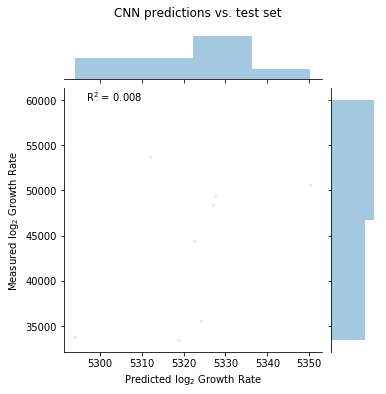

In [149]:
# data
x = Y_pred[test_inds].flatten()
y = Y[test_inds].flatten()

# calculate R^2
r2 = scipy.stats.pearsonr(x, y)[0]**2


g = sns.jointplot(x,
                  y,
                  stat_func = None,
                  kind = 'scatter',
                  s = 5,
                  alpha = 0.1,
                  size = 5)

g.ax_joint.set_xlabel('Predicted log$_2$ Growth Rate')
g.ax_joint.set_ylabel('Measured log$_2$ Growth Rate')



text = "R$^2$ = {:0.2}".format(r2)
plt.annotate(text, xy=(-5.5, 0.95), xycoords='axes fraction')

plt.title("CNN predictions vs. test set", x = -3, y = 1.25)

## Save data and predictions to csv

In [150]:
data['pred_growth_rate'] = Y_pred

In [64]:
data.to_csv(data_dir + 'Random_UTRs_with_predictionsN.csv')

#### WIP torch implementation via mikael.huss@scilifelab.se / https://github.com/hussius/deeplearning-biology 

In [153]:
import sys
import torch
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import random

In [154]:
class DNADataset(Dataset):

    def __init__(self, df, seq_len):
        self.data = df
        self.bases = ['A','C','G','T']
        self.base_dict = dict(zip(self.bases,range(4))) # {'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3}
        self.total_width = seq_len + 20

    def __len__(self):
        return (self.data.shape[0])

    def __getitem__(self, idx):
        seq = self.data.iloc[idx].UTR
        X = np.zeros((1, 4, self.total_width))
        y = self.data.iloc[idx].growth_rate
        for b in range(len(seq)):
            # this will assign a 1 to the appropriate base and position for this UTR sequence
            X[0, self.base_dict[seq[b]], int(b + round((self.total_width - len(seq))/2.))] = 1.
        return(seq, X, y)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(4, 13))
        self.dropout = nn.Dropout(p=0.15)
        self.conv2 = nn.Conv2d(128, 128, (1,13))
        self.fc1 = nn.Linear(128 * 1 * 34, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = x.view(-1, 128 * 1 * 34)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

net = net.cuda() # to run it on GPU, if available

# Loss function etc.
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters())

In [155]:
import ipywidgets
from ipywidgets import IntProgress
from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm

In [156]:
net

Net(
  (conv1): Conv2d (1, 128, kernel_size=(4, 13), stride=(1, 1))
  (dropout): Dropout(p=0.15)
  (conv2): Conv2d (128, 128, kernel_size=(1, 13), stride=(1, 1))
  (fc1): Linear(in_features=4352, out_features=64)
  (fc2): Linear(in_features=64, out_features=1)
)

In [158]:
val_idx = int(0.9*len(train_inds))
val_inds = train_inds[val_idx:]
train_inds = train_inds[:val_idx]


In [159]:
train_data = DNADataset(df.iloc[train_inds], seq_len=50)
val_data = DNADataset(df.iloc[val_inds], seq_len=50)
test_data = DNADataset(df.iloc[test_inds], seq_len=50)

train_data_loader = DataLoader(train_data, batch_size=32,
                        shuffle=True, num_workers=4)

val_data_loader = DataLoader(val_data, batch_size=32) # Validate everything in one batch?!
#seq_val, X_val, y_val = next(iter(val_data_loader))

test_data_loader = DataLoader(test_data, batch_size=32) # Validate everything in one batch?!
#seq_test, X_test, y_test = next(iter(test_data_loader))

In [162]:
train_data_loader
sampled_batch

NameError: name 'sampled_batch' is not defined

In [160]:
for epoch in range(10):
    for i_batch, sampled_batch in enumerate(tqdm(train_data_loader)):
        sequence, transformed_sequence, growth_rate = sampled_batch
        inputs, labels = Variable(transformed_sequence.float().cuda()), Variable(growth_rate.float().cuda())
        optimizer.zero_grad()
        net.train()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    error = 0
    total = 0
    net.eval()
    for batch in tqdm(val_data_loader):
      v_seq, X_v, y_v = batch
      v_pred = net(Variable(X_v.float().cuda()))
      total += y_v.size(0)
      raw_error = v_pred[:,0].data - y_v.float().cuda()
      error += (raw_error**2).sum()
      avg_mse = error / float(total)
      tqdm.write('avg_mse: %.3f' % avg_mse)
#torch.save(net, 'saved_model.t7')

  0%|          | 0/3 [00:00<?, ?it/s]

AttributeError: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 42, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/conda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 42, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-154-1d8d12150ba9>", line 13, in __getitem__
    seq = self.data.iloc[idx].UTR
  File "/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py", line 3614, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'Series' object has no attribute 'UTR'


In [ ]:
error = 0
total = 0
for batch in tqdm(val_data_loader):
                v_seq, X_v, y_v = batch
                v_pred = net(Variable(X_v.float().cuda()))
                total += y_v.size(0)
                raw_error = v_pred[:,0].data - y_v.float().cuda()
                error += (raw_error**2).sum()

avg_mse = error / float(total)

print("Validation error: {}".format(avg_mse))

In [ ]:
actuals = [test_data[i][2] for i in range(len(test_data))]

In [163]:
import scipy.stats
r2 = scipy.stats.pearsonr(preds, actuals)[0]**2
print(r2)

NameError: name 'preds' is not defined